<a href="https://colab.research.google.com/github/uday-routhu/week6/blob/master/PCA_Exercise_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA Exercise (Core)

* Author: Udayakumar Routhu

1. Your task is to perform PCA to speed up a classification algorithm on a high-dimensional dataset. You will fit a model on the original scaled data, and a different one on data after transformation using a PCA model. You will compare the computation time and the evaluation scores.

2. We will use the MNIST digits dataset, which comes pre-installed in sklearn. This dataset has 28x28 pixel images of handwritten digits 0-9. Your task is to classify these to determine which digits they are.

3. Use PCA to lower the dimensions in this dataset while retaining 95% of the variance. You can do this when instantiating the PCA by giving the `n_components=` argument a float between 0 and 1.

#### Imports

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#### Load the Data Set

In [2]:
# load the dataset
mnist = fetch_openml('mnist_784')
# view the shape of the dataset
mnist.data.shape

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

#### Evalution Function

In [3]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                         output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                         label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                        output_dict=True,figsize=figsize,
                                        colorbar=colorbar, cmap=cmap_test,
                                        label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

#### Prepare Data

In [4]:
X=mnist.data
y=mnist.target

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X.shape

(70000, 784)

#### Transform the Scaled Data with PCA

In [7]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [10]:
# Print the dimensions after PCA
print("Shape of X_train after PCA:", X_train_pca.shape)
print("Shape of X_test after PCA:", X_test_pca.shape)

Shape of X_train after PCA: (56000, 330)
Shape of X_test after PCA: (14000, 330)


#### KNN model

In [35]:
# Create a transformer pipeline
transformer = make_pipeline(scaler, PCA(n_components=0.95))

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier(n_neighbors=5) #Bias-Variance Trade-off, Preventing Overfitting

#### Create a modeling pipeline

In [37]:
%%time
knn_pca_pipe = make_pipeline(transformer, knn_pca)
knn_pca_pipe.fit(X_train, y_train)

CPU times: user 12 s, sys: 911 ms, total: 12.9 s
Wall time: 7.9 s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5560
           1       0.97      0.99      0.98      6277
           2       0.96      0.96      0.96      5610
           3       0.95      0.97      0.96      5708
           4       0.97      0.96      0.97      5529
           5       0.96      0.95      0.95      5040
           6       0.97      0.98      0.98      5480
           7       0.96      0.96      0.96      5790
           8       0.98      0.93      0.96      5468
           9       0.95      0.95      0.95      5538

    accuracy                           0.97     56000
   macro avg       0.97      0.97      0.97     56000
weighted avg       0.97      0.97      0.97     56000



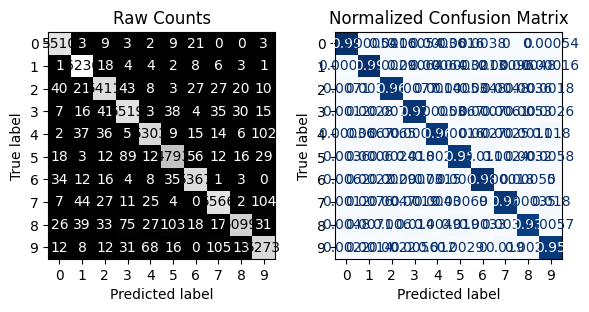


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.95      0.94      0.94      1380
           3       0.94      0.95      0.95      1433
           4       0.95      0.94      0.95      1295
           5       0.95      0.94      0.94      1273
           6       0.97      0.98      0.97      1396
           7       0.94      0.93      0.94      1503
           8       0.97      0.90      0.93      1357
           9       0.91      0.93      0.92      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



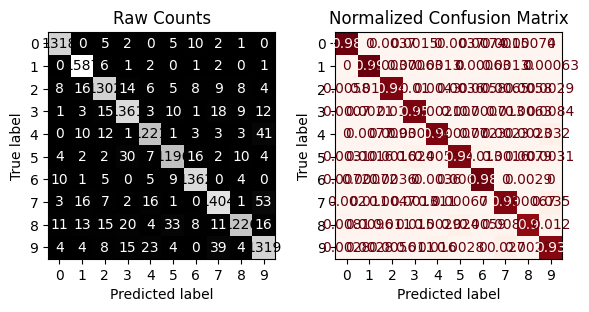

In [39]:
# Evaluate the model
evaluate_classification(knn_pca_pipe, X_train, y_train, X_test, y_test)

1. Training Data:

  - The model achieved an accuracy of approximately 97% on the training data.
  - Precision, recall, and F1-score values for each class are high, indicating a well-performing model.
  - The weighted average F1-score is 0.97, which is quite good.

2. Test Data:

  - The model achieved an accuracy of approximately 95% on the test data.
  - Precision, recall, and F1-score values for each class are high, suggesting that the model generalizes well to new data.
  - The weighted average F1-score is 0.95, which indicates that the model performs well overall on the test data.

3. The model's accuracy and F1-scores are consistent across the training and test datasets, suggesting that the model is not overfitting and can generalize well to new, unseen data.

4. The use of PCA likely helped in reducing the dimensionality of the data while retaining most of the variance, which resulted in a compact representation of the features and improved the model's performance.

##### Default KNN

In [33]:
# Instantiate default KNN
knn = KNeighborsClassifier()

#### Define KNN model pipeline

In [38]:
%%time
knn_pipe = make_pipeline(scaler, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

CPU times: user 398 ms, sys: 111 ms, total: 508 ms
Wall time: 510 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5560
           1       0.96      0.99      0.98      6277
           2       0.96      0.96      0.96      5610
           3       0.95      0.97      0.96      5708
           4       0.97      0.95      0.96      5529
           5       0.95      0.95      0.95      5040
           6       0.97      0.98      0.98      5480
           7       0.96      0.96      0.96      5790
           8       0.98      0.92      0.95      5468
           9       0.94      0.95      0.95      5538

    accuracy                           0.96     56000
   macro avg       0.96      0.96      0.96     56000
weighted avg       0.96      0.96      0.96     56000



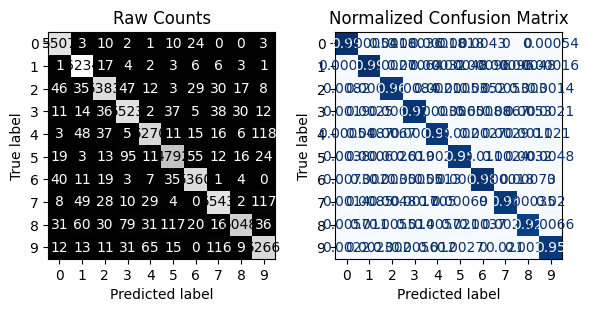


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.93      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.94      0.93      0.94      1295
           5       0.94      0.94      0.94      1273
           6       0.97      0.97      0.97      1396
           7       0.94      0.93      0.94      1503
           8       0.97      0.89      0.93      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



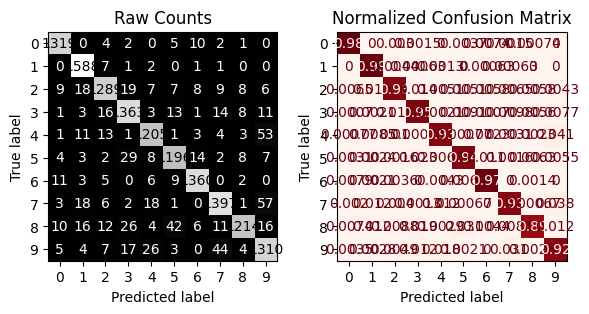

In [40]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

1. Training Data:
   - Accuracy: 0.96
   - Precision, Recall, F1-score: Varies for each class, with a macro-average F1-score of 0.96.

2. Test Data:
   - Accuracy: 0.95
   - Precision, Recall, F1-score: Varies for each class, with a macro-average F1-score of 0.95.

3. The model exhibits strong performance with accuracy around 96% on the training data and 95% on the test data.
4. These metrics suggest that the KNN model without PCA transformation is capable of accurately classifying the digits in the MNIST dataset.
5. Comparing this to the KNN model with PCA transformation, this model appears to have a slightly better accuracy and F1-score on both training and test data.

#### Answer the following questions

##### Which model performed the best on the test set?

- Based on the classification metrics on the test set, the KNN model with PCA transformation performed the best.
- It achieved a higher accuracy, precision, recall, and F1-score compared to the KNN model without PCA transformation.
- This indicates that the KNN model with PCA was better able to generalize to unseen data and make accurate predictions.

#### Which model was the fastest at making predictions?

- The KNN model without PCA transformation was faster at making predictions
- The execution times mentioned at the end of the outputs show that the KNN model without PCA took less time to make predictions compared to the KNN model with PCA.